In [ ]:
##Do not copy Blindly rather learn and the implement !! 

# Instructions:

This is your special assessment for CSE330 Lab. ***Please read the instructions carefully!***

1. You must rename this file as "ID_Name_Section_SA.ipynb". Example: "21212121_Niloy Farhan_01-SA.ipynb".
2. There are 4 tasks and each task have several substasks. This tasks are based on the content of lab 5 and lab 6.
3. You must use designated cells for each task. You should not use additional cells for codes of a task.
4. Some task may have no output. It will be mentioned in the designated cells.
5. Not a single line of code of this assessment should be written by AI. If you do, karma will hit you back. ;)
6. **Plagarism can lead to a zero mark in Final Assessment.**
7. If you have any queries, reach out to your lab faculties.


**Best of luck!**

# Task1.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. Plot the function for $$-2.5 \le x \le 1.5$$

b. What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

f. Compare the error of each method with actual differentiation at $x = 0 , -1.18625$ by showing in a Pandas Dataframe.

g. plot error vs h curves with proper label and color for each method at $x = 0$ and $h = [0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01]$.


In [145]:
# Import cells. This is done for you!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

[-2.         -1.92076271 -0.5819979   0.67242436  1.33033625]


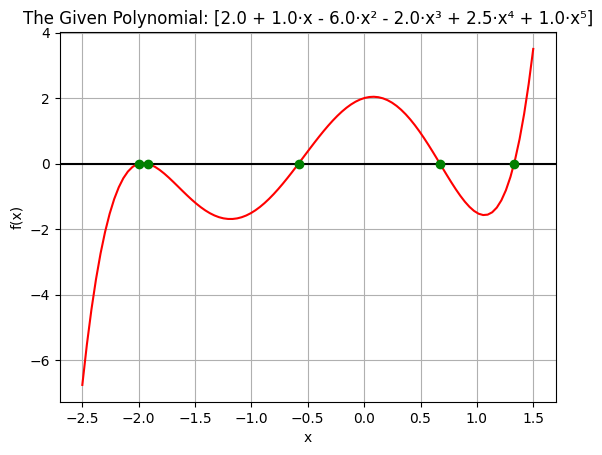

In [146]:
#1.a This cell should plot a graph. You must use polynomial class.
f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
x = np.linspace(-2.5, 1.5, 100)
y = f(x)
dictionary = {
    'x': x,
    'y': y
}
plt.title(f"The Given Polynomial: [{f}]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.axhline(y=0, color='k')
plt.plot(x, y,'r',label="f(x)")
plt.plot(f.roots(), [0.0]*5, 'go')
print(f.roots())
plt.show()

########
Slope at x=0: 2.0

Slope at x=-1.18625: -1.6893654597709626
#######



Polynomial([ 2. ,  1. , -6. , -2. ,  2.5,  1. ], domain=[-1,  1], window=[-1,  1], symbol='x')

f'(x)=1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴




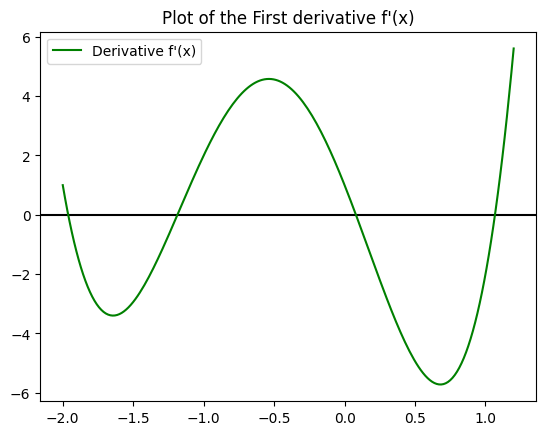

In [147]:
#1.b This cell should print and plot a graph.
p=Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

slope_x0 = p(0)
slope_x1= p(-1.18625)
print(f"########\nSlope at x=0: {slope_x0}\n\nSlope at x=-1.18625: {slope_x1}\n#######\n")

p_prime = p.deriv(1)
display(p)
print(f"f'(x)={p_prime}\n\n")

x_val= np.linspace(-2, 1.2, 200)
y_val = p_prime(x_val)
ax.plot(x_val, y_val, label=f"Derivative f'(x)", color='g')
plt.title("Plot of the First derivative f'(x)")
ax.legend()

In [148]:
#1.c This cell should print
p=Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
def forward_diff(f, h, x):
    return (f(x+h) - f(x)) / h

h=0.1
print(forward_diff(p,h,0))
print(forward_diff(p,h,-1.18625))

0.3826000000000018
0.5520088838012782


In [149]:
#1.d This cell should print
p=Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])

def backward_diff(f, h, x):
    return((f(x)-f(x-h))/h)
h=0.1
print(backward_diff(p,h,0))
print(backward_diff(p,h,-1.18625))

1.5776000000000012
-0.5476397529174859


In [150]:
#1.e This cell should print
p=Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])

def central_diff(f, h, x):

    return(f(x+h)-f(x-h))/ (2*h)
h=0.1
print(central_diff(p,h,0))
print(central_diff(p,h,-1.18625))

0.9801000000000015
0.002184565441896158


In [151]:
#1.f This cell should show a table
p=Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
output=[]

def compare(f, f_prime, h, x):
    Result = {'x' : [], "Actual Diff" : [],"FD": [], "BD" : [], "CD": [], "FD Error" : [], "BD Error": [], "CD Error" : []}
    f_prime_x=f_prime(x)
    fd=forward_diff(f,h,x)
    bd=backward_diff(f,h,x)
    cd=central_diff(f,h,x)

    Result['x'].append(x)
    Result['Actual Diff'].append(f_prime_x)
    Result['FD'].append(fd)
    Result['BD'].append(bd)
    Result['CD'].append(cd)
    Result['FD Error'].append(abs(f_prime_x-fd))
    Result['BD Error'].append(abs(f_prime_x-bd))
    Result['CD Error'].append(abs(f_prime_x-cd))
    output.append(Result)


compare(p, p_prime, h, 0)
compare(p, p_prime, h, -1.18625)
pd.DataFrame(output)

,x,Actual Diff,FD,BD,CD,FD Error,BD Error,CD Error
0,[0],[1.0],[0.3826000000000018],[1.5776000000000012],[0.9801000000000015],[0.6173999999999982],[0.5776000000000012],[0.019899999999998474]
1,[-1.18625],[-9.340808105218201e-06],[0.5520088838012782],[-0.5476397529174859],[0.002184565441896158],[0.5520182246093834],[0.5476304121093807],[0.002193906250001376]


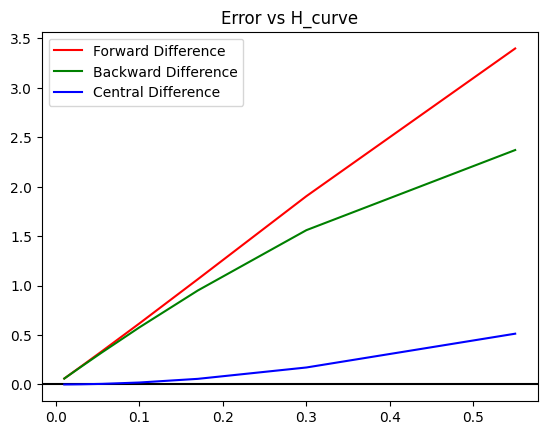

In [152]:
#1g This cell should plot a graph.
p=Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
fig, ax = plt.subplots()

h= [0.55, 0.3, 0.17, 0.1, 0.055, 0.03, 0.017, 0.01]

fd_error = []
bd_error = []
cd_error = []
actual_derivative = p_prime(0)
for i in h:
    fd = forward_diff(p, i, 0)
    bd = backward_diff(p, i, 0)
    cd = central_diff(p, i, 0)
    fd_error.append(abs(actual_derivative - fd))
    bd_error.append(abs(actual_derivative - bd))
    cd_error.append(abs(actual_derivative - cd))

ax.axhline(y=0, color='k')
plt.title(f"Error vs H_curve")
ax.plot(h, fd_error, label='Forward Difference', color='r')
ax.plot(h, bd_error, label='Backward Difference', color='g')
ax.plot(h, cd_error, label='Central Difference', color='b')
ax.legend()
plt.show()

# Task 2.

a. Propose a better technique for numerical differentiation that provides higher accuracy than the methods you have worked so far. You need to write a function for your proposed technique.

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

b. Using your proposed method, what is the slope of $f(x)$  at $x=0,−1.18625$ and step size = 0.1?

c. Compare the error of your method with  actual, forward, backward and central differentiation at  $x=0,−1.18625$  by showing in Pandas Dataframe.

d. Plot actual derivative, Forward derivative, Backward derivative, Central derivative and the derivative from your proposed method in a graph. Here, $$h = 0.1, -2 \le x \le 1.2$$

In [153]:
#2a. This cell should not have any output.
Proposed_Method_Name = "Richardson Extrapolation"
def dh(f, h, x):
    return(f(x+h)-f(x-h))/ (2*h)
def dh1(f, h, x):
    return((4*dh(f, h/2, x) - dh(f, h, x))/3)

In [154]:
#2b. This cell should print
p= Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
h = 0.1
print(dh1(p, h, 0))
print(dh1(p, h, -1.18625))

0.9999750000000011
-3.4340808106048115e-05


In [155]:
#2c.This cell should print
p= Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
output=[]
h=0.1
def compare1(f, f_prime, h, x):
    Result = {'x' : [], "Actual Diff" : [],"FD": [], "BD" : [], "CD": [],"RE": [], "FD Error" : [], "BD Error": [], "CD Error" : [], "RE Error" : []}
    f_prime_x=f_prime(x)
    fd=forward_diff(f,h,x)
    bd=backward_diff(f,h,x)
    cd=central_diff(f,h,x)
    re=dh1(f,h,x)

    Result['x'].append(x)
    Result['Actual Diff'].append(f_prime_x)
    Result['FD'].append(fd)
    Result['BD'].append(bd)
    Result['CD'].append(cd)
    Result['RE'].append(re)


    Result['FD Error'].append(abs(f_prime_x-fd))
    Result['BD Error'].append(abs(f_prime_x-bd))
    Result['CD Error'].append(abs(f_prime_x-cd))
    Result['RE Error'].append(abs(f_prime_x-re))
    output.append(Result)


compare1(p, p_prime, h, 0)
compare1(p, p_prime, h, -1.18625)
pd.DataFrame(output)

,x,Actual Diff,FD,BD,CD,RE,FD Error,BD Error,CD Error,RE Error
0,[0],[1.0],[0.3826000000000018],[1.5776000000000012],[0.9801000000000015],[0.9999750000000011],[0.6173999999999982],[0.5776000000000012],[0.019899999999998474],[2.4999999998942535e-05]
1,[-1.18625],[-9.340808105218201e-06],[0.5520088838012782],[-0.5476397529174859],[0.002184565441896158],[-3.4340808106048115e-05],[0.5520182246093834],[0.5476304121093807],[0.002193906250001376],[2.5000000000829914e-05]


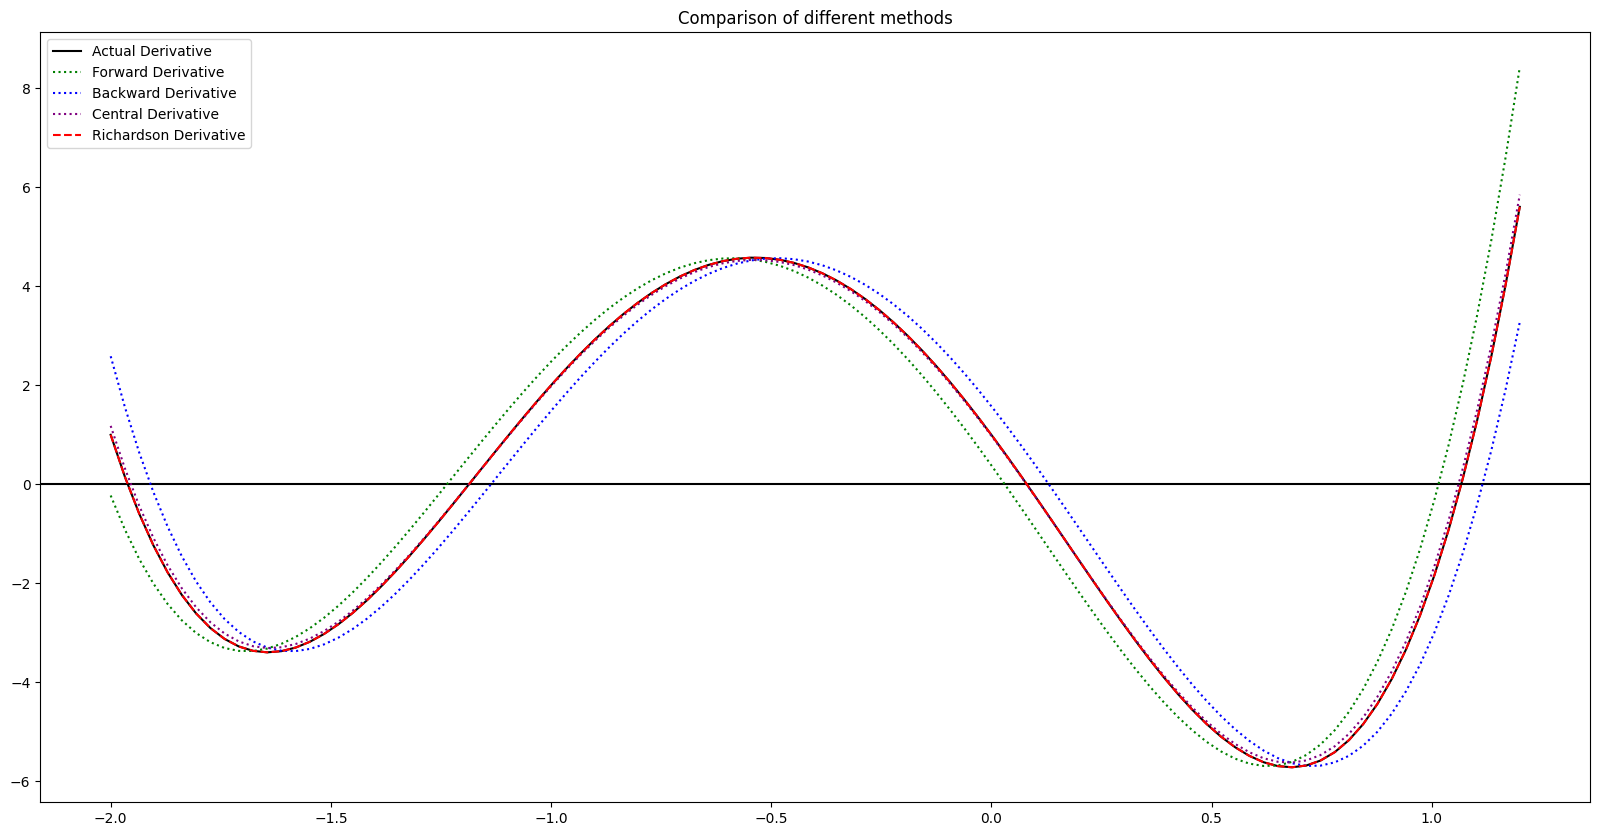

In [156]:
#2.d This cell should plot a graph.
p= Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
fig, ax = plt.subplots(figsize=(20,10))
h=0.1
x_val=np.linspace(-2,1.2,100)
ad=[]
fd=[]
bd=[]
cd=[]
re=[]
p_prime=p.deriv(1)

for i in x_val:
    ad.append(p_prime(i))
    fd.append(forward_diff(p,h,i))
    bd.append(backward_diff(p,h,i))
    cd.append(central_diff(p,h,i))
    re.append(dh1(p,h,i))

ax.axhline(y=0, color='k')
plt.title(f"Comparison of different methods")
ax.plot(x_val,ad, label='Actual Derivative',color='k')
ax.plot(x_val,fd, label='Forward Derivative',linestyle=":", color='g')
ax.plot(x_val,bd, label='Backward Derivative',linestyle=":", color='b')
ax.plot(x_val,cd, label='Central Derivative',linestyle=":", color='purple')
ax.plot(x_val,re, label='Richardson Derivative',linestyle="--", color='r')
ax.legend()

# Task 3.

Given,
$f(x) = \frac{-1}{13}x^3 + 2x^2 - 9.5x - 10\tag{3.1}$

a. (i) Write a python function that takes an input function and a list of intervals as a list and returns a dictionary that contains either root exists or not in each intervals.
Determine if root exists in $[(-20,-10),(-10,0), (0,10), (10,20), (20,30)]$.

(ii) Verify your method by ploting the function and the intervals.

In [157]:
#3a_i This cell should print
output={}
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]  #  This snippet will be given in the question
p=Polynomial([-10.0,-9.5,2.0,-(1/13)])

def root_finder(p,interval):
    for i in interval:
        s,e=i #start and the end denoted as S,E
        f1=p(s)
        f2=p(e)
        if f1*f2<0:
            if "Root" not in output:
                output["Root"]=[i]
            else:
                output["Root"].append(i)
        else:
            if "No Root" not in output:
                output["No Root"]=[i]
            else:
                output["No Root"].append(i)



root_finder(p,intervals)

for i,j in output.items():
    if i=="Root":
        print(f"Roots Exist in the interval:")
        for k in j:
            print(k)
        print()
    else:
        print(f"No Roots Exist in the interval:")
        for k in j:
            print(k)
        print()

# print(output)
# print(p.roots())

No Roots Exist in the interval:
(-20, -10)
(20, 30)

Roots Exist in the interval:
(-10, 0)
(0, 10)
(10, 20)



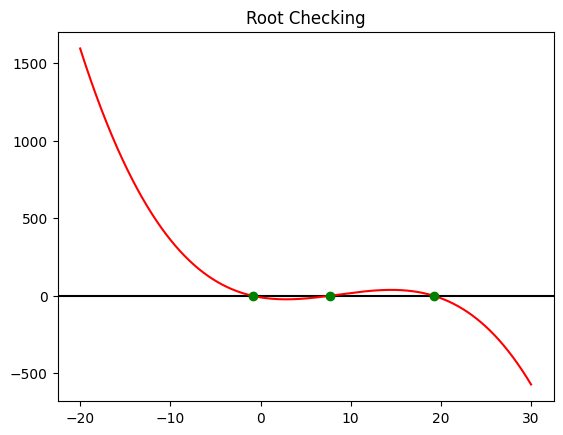

In [158]:
#3a_ii This cell should plot a graph.
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]
p=Polynomial([-10.0,-9.5,2.0,-(1/13)])

x_val=[]
y_val=[]

for i in intervals:
    s,e=i
    for j in (np.linspace(s,e,500)):
        x_val.append(j)
        y_val.append(p(j))

root=p.roots()
yaxs=[]
for i in root:
    yaxs.append(0) #as root values in y axis is 0 as it intersects the x axis only

plt.axhline(y=0, color='k')
plt.title(f"Root Checking")
plt.plot(x_val,y_val,color='r')
plt.plot(root, yaxs, 'go')
plt.show()

b. Using Bisection method, find roots of the function $3.1$ in these intervals $[(−20,−10),(−10,0),(0,10),(10,20),(20,30)]$ where root exists. The value of machine epsilon is, $\epsilon < 10^{-6}$


You can reuse the function of Task 3.a to find out the intervals that contains root.
Note: You should return 3 different roots for the function (3.1).

In [159]:
###############       Code From 3.a   #####################
output={}
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]
p=Polynomial([-10.0,-9.5,2.0,-(1/13)])

def root_finder(p,interval):
    for i in interval:
        s,e=i #start and the end denoted as S,E
        f1=p(s)
        f2=p(e)
        if f1*f2<0:
            if "Root" not in output:
                output["Root"]=[i]
            else:
                output["Root"].append(i)
        else:
            if "No Root" not in output:
                output["No Root"]=[i]
            else:
                output["No Root"].append(i)
############# Previous Task Code #########################
root_finder(p,intervals)

final_roots=[]
def bisection(f, a, b, e):

    m = (a + b) / 2
    root = 0.0
    list_a = []
    list_b = []
    list_m = []
    list_f = []

    while True:
        list_a.append(a)
        list_b.append(b)
        list_m.append(m)
        list_f.append(f(m))

        if f(a)*f(m)>0:
            a=m
        elif f(a)*f(m)<0:
            b=m
        elif f(m)==0:
            root=m
            break

        oldm=m
        m=(a+b)/2
        if abs((m-oldm)/m)<=e:
            root=m
            break
    final_roots.append(root)

for i in output["Root"]:
    bisection(p,i[0],i[1],1e-6)

print(final_roots)




[-0.8829361200332642, 7.658982276916504, 19.223957061767578]


c. Plot the f(x) along with the roots to check if your method is working correctly.

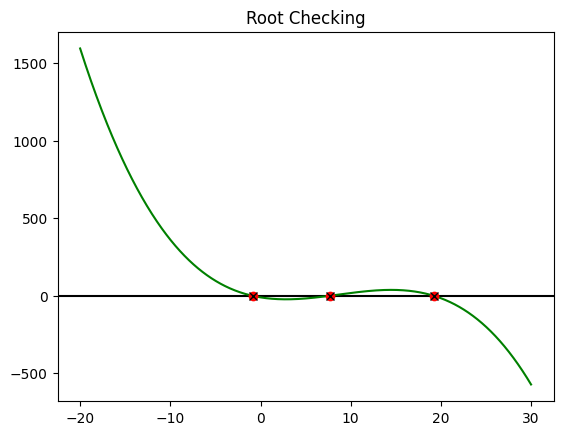

In [160]:
#3c This cell plot a graph.
p=Polynomial([-10.0,-9.5,2.0,-(1/13)])
x_val=np.linspace(-20,30,1000)
y_val=p(x_val)
plt.axhline(y=0, color='k')
plt.title(f"Root Checking")
plt.plot(x_val,y_val,color='g')
plt.plot(p.roots(),len(p.roots())*[0],'ro') #Actual roots
plt.plot(final_roots,len(final_roots)*[0],'kx') #Actual roots
plt.show()
#The method is working correctly with minimum errors

Task4.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + \frac{x}{2} + 2\tag{4.1}$$

a. Find the actual roots of $f(x)$ and print them.

b. Plot the function for $-2.5 \le x \le 1.5$, also point out the the found roots in the plot

c. The following $g_{1}(x)$ is given which is derived from Eq$(4.1)$, \\
   Use Contraction Mapping Theorem and calculate the value of λ for the given $g(x)$ $$g_{1}(x)= \frac{1}{2}(-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2)\tag{4.2}$$

d. Compute the convergence/divergence table using all the calculated roots for the given $g_{1}(x)$ and prove the whole $g_{1}(x)$ is divergent

Given,

$$g_{2}(x)= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 -2x^3 + \frac{1}{2}x + 2)}\tag{4.3}$$
$$g_{3}(x) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - \frac{1}{2}x - 2)}\tag{4.4}$$
e. Derive 2 more separate $g_{4}(x)$ and $g_{5}(x)$ from the given $f(x)$. Implement $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$.

f. Apply Fixed Point Method on the $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$. and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

g. Plot the $g(x)$s where actual roots were found along with $f(x)$.

In [161]:
#4a This cell should print
p=Polynomial([2.0,0.5,-6,-2,2.5,1])
print("Actual roots:")
for i in p.roots():
    print(i)

Actual roots:
-2.2202758315065463
-1.6180339887498945
-0.6549917792369001
0.6180339887498955
1.375267610743446


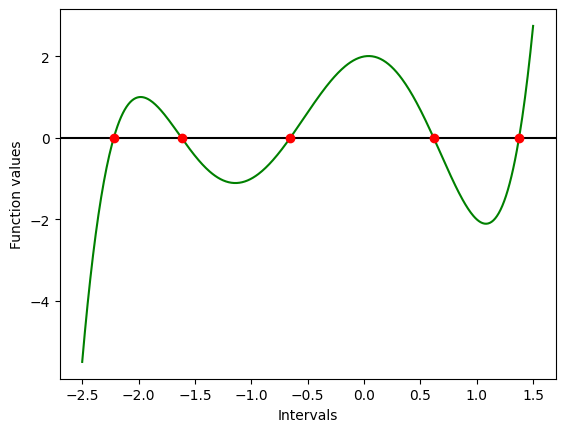

In [162]:
#4b This cell should print plot a graph
p=Polynomial([2.0,0.5,-6,-2,2.5,1])
x_val=np.linspace(-2.5,1.5,500)
y_val=p(x_val)
plt.xlabel("Intervals")
plt.ylabel("Function values")
plt.axhline(y=0, color='k')
plt.plot(x_val,y_val,color='g')

plt.plot(p.roots(),len(p.roots())*[0.0],"ro")
plt.show()

In [163]:
#4c This cell should print
p=Polynomial([-1.0,0.0,3.0,1.0,1.25,-0.5])
# display(p)
p_prime=p.deriv(1)
g1a=[]
root=p.roots()
def lamda_finder(p_prime,root):

    for i in root:
        x=abs(p_prime(i))
        g1a.append(x)


lamda_finder(p_prime,root)
print(f"Lamda Values are: {g1a}")

Lamda Values are: [3.758959073997963, 11.381704184361011, 11.381704184361011, 4.3872185436900555, 110.5167772435969]


In [164]:
#4d This cell should print
result={}
for i in g1a:
    if i==0:
        result.update({i:"Super linear Convergence"})
    elif 0<i<1:
        result.update({i:"linear Convergence"})
    elif i==1:
        result.update({i:"Fixed Point"})
    elif i>1:
        result.update({i:"Divergent"})

print(result)

for i,j in result.items():
    if j=="Super linear Convergence":
        print(f"The function is {j}")
        break
    elif j=="linear Convergence":
        print(f"The function is {j}")
        break
    elif j=="Fixed Point":
        print(f"The function is {j}")
        break

    elif i==g1a[-1]:
        print(f"The function is {j}")

{3.758959073997963: 'Divergent', 11.381704184361011: 'Divergent', 4.3872185436900555: 'Divergent', 110.5167772435969: 'Divergent'}
The function is Divergent


In [165]:
#4e This cell have no outputs
def g2(x):
    p=Polynomial([2.0,0.5,0.0,-2,2.5,1])
    return np.power(p(x)/6,1.0/2.0)

def g3(x):
    p=Polynomial([-2.0,-0.5,6.0,2.0,0.0,-1])
    return np.power(p(x)/2.5,1.0/4.0)

def g4(x):
    p=Polynomial([0.5,-6.0,-2.0,2.5,1.0])
    return -2/p(x)

def g5(x):
    p=Polynomial([-2.0,-0.5,6.0,2.0,-2.5])
    return np.power(p(x),1/5)



In [166]:
#4f This cell should print
def checker(x):
    if x==0:
        return ("Super linear Convergence")
    elif 0<x<1:
        return ("linear Convergence")
    elif x==1:
        return ("Fixed Point")
    elif x>1:
        return ("Divergent")


result={}
a2 = 0.80
g2_a = []
g2_status=[]

a3 = 0.80
g3_a = []
g3_status=[]

a4 = 0.80
g4_a = []
g4_status=[]

a5 = 0.80
g5_a = []
g5_status=[]


g2_a.append(a2)
g3_a.append(a3)
g4_a.append(a4)
g5_a.append(a5)


for i in range(20):
    x2=g2(g2_a[i])
    x3=g3(g3_a[i])
    x4=g4(g4_a[i])
    x5=g5(g5_a[i])

    g2_a.append(x2)
    g3_a.append(x3)
    g4_a.append(x4)
    g5_a.append(x5)

    x2_status=checker(x2)
    x3_status=checker(x3)
    x4_status=checker(x4)
    x5_status=checker(x5)

    g2_status.append(x2_status)
    g3_status.append(x3_status)
    g4_status.append(x4_status)
    g5_status.append(x5_status)

g2_status.insert(0,"Starting point")
g3_status.insert(0,"Starting point")
g4_status.insert(0,"Starting point")
g5_status.insert(0,"Starting point")

result={
    "g(2)":g2_a,
    "g(2)_Root_type":g2_status,
    "g(3)":g3_a,
    "g(3) Root type":g3_status,
    "g(4)":g4_a,
    "g(4) Root type":g4_status,
    "g(5)":g5_a,
    "g(5) Root type":g5_status,
}
data=pd.DataFrame(result)
data.head(25)

,g(2),g(2)_Root_type,g(3),g(3) Root type,g(4),g(4) Root type,g(5),g(5) Root type
0,0.800000,Starting point,0.800000,Starting point,0.800000,Starting point,0.800000,Starting point
1,0.674250,linear Convergence,0.961461,linear Convergence,0.514086,linear Convergence,1.075654,Divergent
2,0.629830,linear Convergence,1.126203,Divergent,0.739761,linear Convergence,1.288144,Divergent
3,0.620179,linear Convergence,1.249411,Divergent,0.537418,linear Convergence,1.362956,Divergent
4,0.618412,linear Convergence,1.320336,Divergent,0.706543,linear Convergence,1.374225,Divergent
5,0.618100,linear Convergence,1.353509,Divergent,0.554525,linear Convergence,1.375189,Divergent
6,0.618046,linear Convergence,1.367069,Divergent,0.684626,linear Convergence,1.375262,Divergent
7,0.618036,linear Convergence,1.372244,Divergent,0.567657,linear Convergence,1.375267,Divergent
8,0.618034,linear Convergence,1.374162,Divergent,0.669058,linear Convergence,1.375268,Divergent
9,0.618034,linear Convergence,1.374865,Divergent,0.577950,linear Convergence,1.375268,Divergent


<ipython-input-165-c1cfc5df8076>:8: RuntimeWarning: invalid value encountered in power
  return np.power(p(x)/2.5,1.0/4.0)


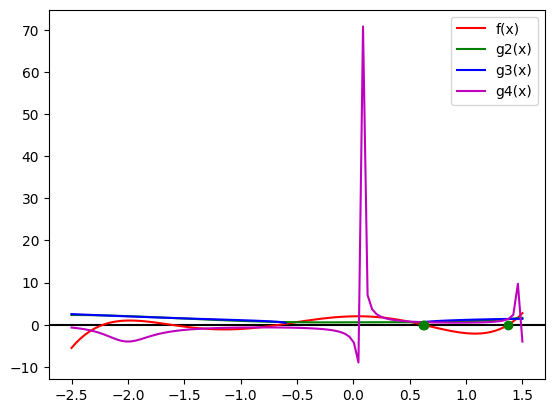

In [167]:
#4g This cell should plot a graph. Do not plot those g(x) which will not converge.
#From the above data frame we can see that g(2),g(4) is converging and may have roots.
#Also g(3) is converging at only one point so it is converging also.

#Plotting g2,g3,g4 and fx

f=Polynomial([2.0,0.5,-6,-2,2.5,1])
xs = np.linspace(-2.5, 1.5, 100)
ys = f(xs)
dictionary = {
    'x': xs,
    'y': ys
}

plt.axhline(y=0, color='k')
plt.plot(xs, f(xs), label='f(x)', color='r')
plt.plot(xs, g2(xs), label='g2(x)', color='g')
plt.plot(xs, g3(xs), label='g3(x)', color ='b')
plt.plot(xs, g4(xs), label='g4(x)', color = 'm' )
plt.legend()

if len(g2_a) > 0:
    root = np.array([g2_a[len(g2_a)-1], g3_a[len(g3_a)-1], g4_a[len(g4_a)-1]])
plt.plot(root, f(root), 'go')
plt.show()